In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [89]:
start_date = '2018-01-01'
end_date  = '2018-01-07'

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
columns = inspector.get_columns('measurement')

In [15]:
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
columns_1 = inspector.get_columns('station')

In [17]:
for d in columns_1:
    print(d['name'],d['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [19]:
results=session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1)

In [20]:
# Calculate the date 1 year ago from the last data point in the database

results=session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1)
for date in results:
    last_date=date

print(last_date[0])
my_date = datetime.strptime(last_date[0], "%Y-%m-%d")
N=365
d = timedelta(days = N)
print(d)
an_year_ago = my_date - d
print(an_year_ago)

2017-08-23
365 days, 0:00:00
2016-08-23 00:00:00


In [21]:
results=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>an_year_ago)


In [22]:
df = pd.DataFrame(results, columns=['date', 'prec'])
df.set_index('date', inplace=True)
df.sort_index(axis = 0) 
df.tail(500)

,prec
date,
2017-03-11,0.01
2017-03-12,0.00
2017-03-13,0.00
2017-03-14,0.00
2017-03-15,0.06
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [23]:
y=df['prec']

x=df.index.values

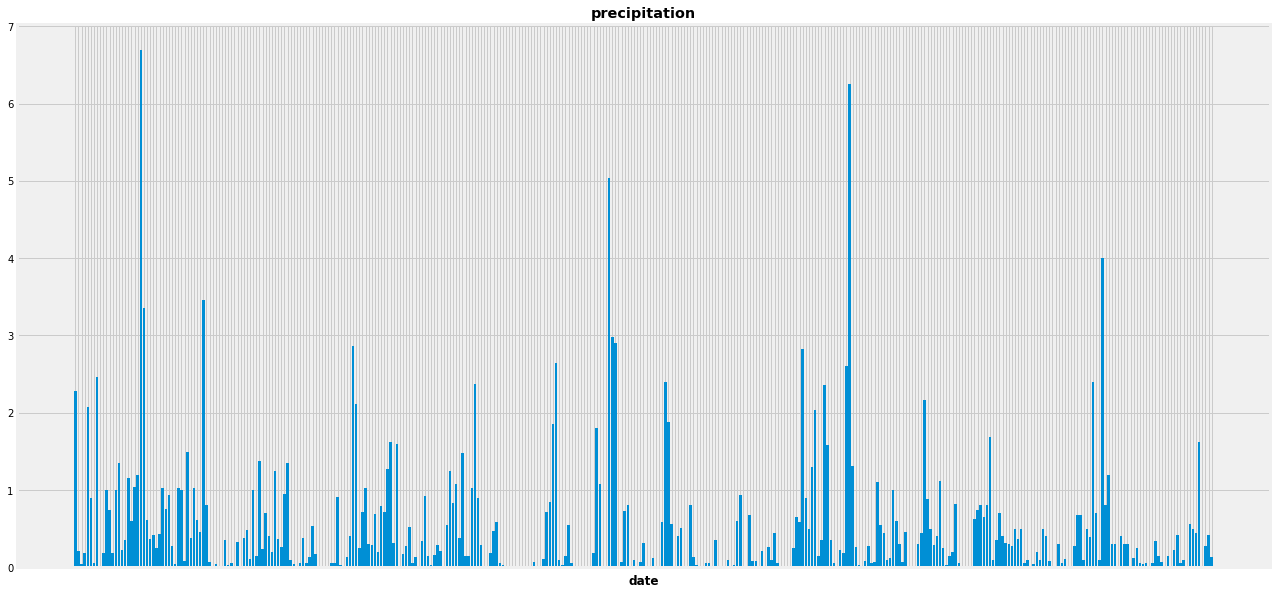

In [24]:
fig= plt.figure(figsize=(20,10))
plt.xlabel('date',fontweight='bold')
plt.grid(True)
plt.bar(x,y,linewidth=10.0)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.title('precipitation',fontweight='bold')
plt.show()

In [25]:
df.describe()

,prec
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![precipitation](Images/precipitation.png)

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data


![describe](Images/describe.png)

In [27]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [28]:
session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [30]:
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs).\
              filter(Measurement.station=='USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [32]:
session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
results=session.query(Measurement.tobs).\
filter(Measurement.date>an_year_ago).filter (Measurement.station =='USC00519281').all()

results

df = pd.DataFrame(results, columns=['tbs'])


Text(0.5, 1.0, 'Tbs vs Frequency')

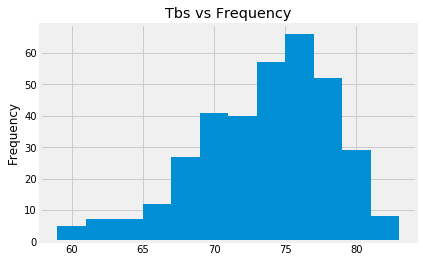

In [34]:
hist_plot=df['tbs'].hist(bins=12)
hist_plot.set_ylabel("Frequency")
hist_plot.set_title("Tbs vs Frequency")

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [41]:
# # Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).all()


# function usage example
dates = (calc_temps('2017-01-01'))

for tmin,tavg,tmax in dates:
    temp_min = tmin
    temp_avg = tavg
    temp_max = tmax

In [43]:
print(temp_min)
print(temp_max)
print(temp_avg)

58.0
87.0
74.14387974230493


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [191]:
### Temperature Analysis I
sel = [Measurement.station, 
       func.avg(Measurement.tobs)
       ]
june_averages = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
june_averages

df=pd.DataFrame(june_averages, columns=['station', 'avg_temp'])

population1=df[['avg_temp']]

In [192]:
### Temperature Analysis I
sel = [Measurement.station, 
       func.avg(Measurement.tobs)
       ]
dec_averages = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
dec_averages

df=pd.DataFrame(dec_averages, columns=['station', 'avg_temp'])

population2=df[['avg_temp']]

In [186]:
import scipy.stats as stats

In [193]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=array([4.61586542]), pvalue=array([0.00036573]))

# Observations

We are using Paired T-test because Paired t-test compares study subjects at 2 different times (paired observations of the same subject)

As P value is less than 0.01 , the difference in mean is statistically significant

In [59]:
error= temp_max-temp_min
print(error)
value = ['temp_avg']
x_pos=np.arange(len(value))

29.0


Text(0.5, 1.0, 'Trip Avg Temp')

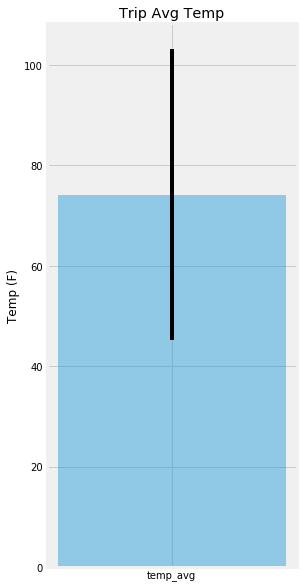

In [83]:
fig, ax = plt.subplots(figsize=(4,10))
ax.bar(x_pos,temp_avg,yerr=error, align='center', ecolor='black',capsize=0,alpha=0.4)
ax.set_ylabel('Temp (F)')
ax.set_xticks(x_pos)
ax.set_xticklabels(value)
ax.set_title('Trip Avg Temp')

<IPython.core.display.Javascript object>


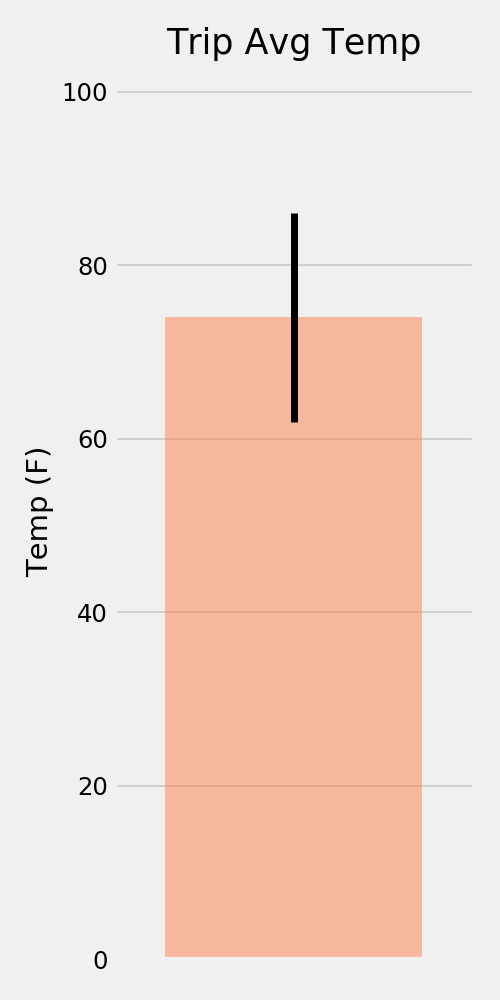

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [183]:
session.query(Measurement.station,Measurement.date,Measurement.prcp).\
filter(Measurement.date >= '2017-01-01').filter(Measurement.date <= '2017-01-07').all()

[('USC00519397', '2017-01-01', 0.0),
 ('USC00519397', '2017-01-02', 0.0),
 ('USC00519397', '2017-01-03', 0.0),
 ('USC00519397', '2017-01-04', 0.0),
 ('USC00519397', '2017-01-05', 0.0),
 ('USC00519397', '2017-01-06', 0.0),
 ('USC00519397', '2017-01-07', 0.0),
 ('USC00513117', '2017-01-01', 0.29),
 ('USC00513117', '2017-01-02', 0.0),
 ('USC00513117', '2017-01-03', 0.0),
 ('USC00513117', '2017-01-04', 0.0),
 ('USC00513117', '2017-01-05', 0.0),
 ('USC00513117', '2017-01-06', 0.0),
 ('USC00513117', '2017-01-07', 0.06),
 ('USC00514830', '2017-01-01', 0.0),
 ('USC00514830', '2017-01-02', 0.01),
 ('USC00514830', '2017-01-03', 0.0),
 ('USC00514830', '2017-01-04', 0.0),
 ('USC00514830', '2017-01-05', 0.0),
 ('USC00514830', '2017-01-06', 0.59),
 ('USC00514830', '2017-01-07', 0.0),
 ('USC00519523', '2017-01-01', None),
 ('USC00519523', '2017-01-03', None),
 ('USC00519523', '2017-01-04', 0.18),
 ('USC00519523', '2017-01-05', 0.42),
 ('USC00519523', '2017-01-06', 0.01),
 ('USC00519523', '2017-01-07'

In [193]:
session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).group_by(Measurement.station).\
order_by(func.sum(Measurement.prcp).desc()).\
filter(Measurement.date >= '2017-01-01').filter(Measurement.date <= '2017-01-07').\
filter(Measurement.station == Station.station).all()

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.6),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.35),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.2),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)]

## Optional Challenge Assignment

In [313]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [314]:
start_date = "2018-01-01"
end_date = "2018-01-07"

start_date_1=datetime.strptime(start_date, "%Y-%m-%d")
end_date_1=datetime.strptime(end_date, "%Y-%m-%d")

list_dates=[]
list_full_dates=[]

str_date=str(start_date_1)

list_full_dates.append(str_date[0:10])
list_dates.append((str_date[5:10]))
step = timedelta(days=1)
while start_date_1 < end_date_1:
      start_date_1 = start_date_1 + step
      str_date=str(start_date_1)
      list_full_dates.append(str_date[0:10])  
      list_dates.append((str_date[5:10]))

#length = len(list_dates)    
normal=[]
for value in list_dates:
    results=daily_normals(value)
    for result in results:
        normal.append(result)
  
print(normal)

[(62.0, 69.15384615384616, 77.0), (60.0, 69.39622641509433, 77.0), (62.0, 68.9090909090909, 77.0), (58.0, 70.0, 76.0), (56.0, 67.96428571428571, 76.0), (61.0, 68.96491228070175, 76.0), (57.0, 68.54385964912281, 76.0)]


In [296]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})

df

df.replace(0, 100)

,A,B,C
0,100,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [315]:
print(list_full_dates)
df=pd.DataFrame(normal,columns=['tmin','tavg','tmax'])
df

['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07']


,tmin,tavg,tmax
0,62.0,69.153846,77.0
1,60.0,69.396226,77.0
2,62.0,68.909091,77.0
3,58.0,70.000000,76.0
4,56.0,67.964286,76.0
5,61.0,68.964912,76.0
6,57.0,68.543860,76.0


# Data Frame

In [339]:
#Data Frame

df['date'] = list_full_dates
    
df.set_index('date', inplace=True)  

df

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


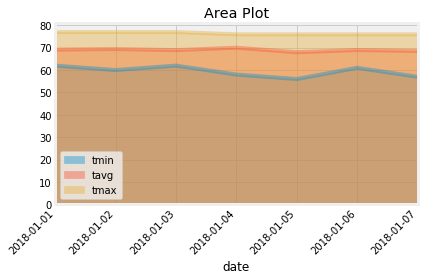

In [338]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area', stacked=False, alpha=0.4,
        title='Area Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()